<a href="https://colab.research.google.com/github/NataliaArteaga/test_directory/blob/master/RegresionLinealMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
datos = pd.read_csv('./datosTesisCorrected.csv')
datos.head()
datos = datos.dropna()
datos.shape

(58, 7)

In [2]:
import statsmodels.api as sm
from scipy import stats


X = datos.iloc[:,[1,2,3,4,5,6]]
y = datos.CLL

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                    CLL   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.282
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.282
Time:                        04:11:46   Log-Likelihood:                -230.05
No. Observations:                  58   AIC:                             474.1
Df Residuals:                      51   BIC:                             488.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.769e+05   1.15e+05     -1.537      0.1

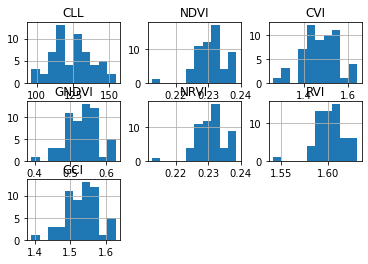

coeficientes [[-1.08473164e+10 -8.85904955e+02 -3.62854414e+05  1.08473262e+10
  -3.79132977e+03  3.64479348e+05]]
Interseccion [-360162.12417313]
Suma de cuadrados residual: 505.52
R2: -4.57
mae: 16.84
varianza modelo: -0.80


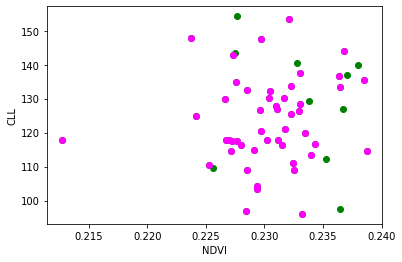

In [7]:
import statsmodels.api as sm
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import csv
import pylab as pl

datos = pd.read_csv('./datosTesisCorrected.csv')
datos.describe()
cda= datos[['CLL','NDVI','CVI','GNDVI', 'NRVI', 'RVI', 'GCI']]
cda.head(6)
viz=cda[['CLL','NDVI','CVI','GNDVI', 'NRVI', 'RVI', 'GCI']]
viz.hist()
plt.show()

plt.scatter(cda.NDVI,cda.CLL, color='green')
plt.xlabel('NDVI')
plt.ylabel('CLL')
plt.show



msk = np.random.rand(len(datos)) < 0.85
entreno = cda[msk]
test = cda[~msk]


plt.scatter(entreno.NDVI,entreno.CLL, color='magenta')
plt.xlabel('NDVI')
plt.ylabel('CLL')
plt.show

from sklearn import linear_model
regr = linear_model.LinearRegression ()
x = np.asanyarray(entreno[['NDVI','CVI','GNDVI', 'NRVI', 'RVI', 'GCI']])
y = np.asanyarray(entreno[['CLL']])
regr.fit(x,y)

print('coeficientes', regr.coef_)
print('Interseccion', regr.intercept_)

y_hat = regr.predict(test[['NDVI','CVI','GNDVI', 'NRVI', 'RVI', 'GCI']])
x = np.asanyarray(test[['NDVI','CVI','GNDVI', 'NRVI', 'RVI', 'GCI']])
y = np.asanyarray(test[['CLL']])

from sklearn.metrics import r2_score

print("Suma de cuadrados residual: %.2f" % np.mean((y_hat - y) ** 2))
print("R2: %.2f" % r2_score(y_hat, y))
print("mae: %.2f" % mean_absolute_error(y, y_hat)) 
print("varianza modelo: %.2f" % regr.score(x, y))   